| **Inicio** | **atrás 3** |
|----------- |-------------- |
| [🏠](../../../README.md) | [⏪](./3.ARIMA.ipynb)|

# **4. OTROS MÉTODOS**

## **STL con LOESS**

STL (Seasonal and Trend decomposition using Loess) es un método utilizado para descomponer una serie de tiempo en sus componentes de tendencia, estacionalidad y residuos. Combina el método de suavizado LOESS (Locally Weighted Scatterplot Smoothing) con un enfoque de descomposición estacional para extraer estas componentes.

El método STL utiliza LOESS para suavizar la serie de tiempo y eliminar la variabilidad de alta frecuencia, revelando así la tendencia y la estacionalidad subyacente. LOESS es un método de suavizado no paramétrico que ajusta una función polinomial localmente ponderada a los puntos de datos cercanos, lo que permite capturar las tendencias y patrones subyacentes en la serie de tiempo.

A continuación se muestra un ejemplo de cómo utilizar el método STL con LOESS en Python para descomponer una serie de tiempo y visualizar sus componentes:

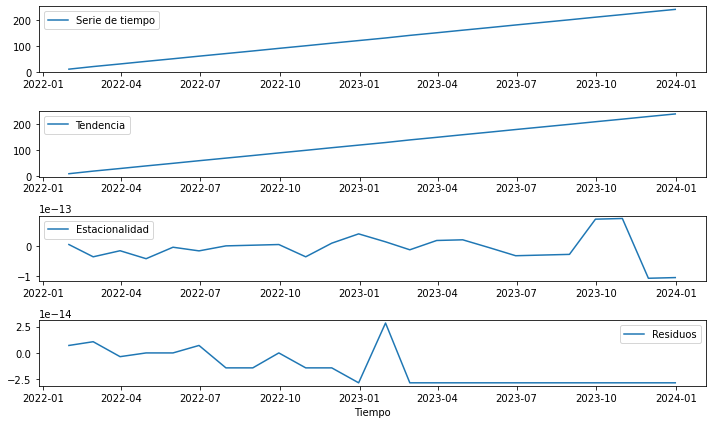

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Crear una serie de tiempo sintética con tendencia y estacionalidad
fechas = pd.date_range(start='2022-01-01', end='2023-12-31', freq='M')
valores = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240]
serie_tiempo = pd.Series(valores, index=fechas)

# Aplicar el método STL con LOESS
stl = STL(serie_tiempo)
resultado = stl.fit()

# Obtener las componentes descompuestas
tendencia = resultado.trend
estacionalidad = resultado.seasonal
residuos = resultado.resid

# Graficar las componentes
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(serie_tiempo, label='Serie de tiempo')
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(tendencia, label='Tendencia')
plt.legend()
plt.subplot(4, 1, 3)
plt.plot(estacionalidad, label='Estacionalidad')
plt.legend()
plt.subplot(4, 1, 4)
plt.plot(residuos, label='Residuos')
plt.legend()
plt.xlabel('Tiempo')
plt.tight_layout()
plt.show()

En este ejemplo, se crea una serie de tiempo sintética que contiene tanto una tendencia creciente como una estacionalidad mensual. Luego se aplica el método STL con LOESS a la serie de tiempo para descomponerla en sus componentes de tendencia, estacionalidad y residuos. Finalmente, se grafican las cuatro componentes por separado.

El gráfico resultante muestra la serie de tiempo original, la tendencia, la estacionalidad y los residuos. La tendencia representa la dirección general de la serie de tiempo, la estacionalidad muestra los patrones repetitivos a lo largo del tiempo y los residuos representan la variación no explicada por la tendencia y la estacionalidad.

La descomposición de la serie de tiempo en sus componentes subyacentes puede ayudar a comprender mejor los patrones y las características de la serie, así como a realizar pronósticos más precisos al modelar individualmente cada componente. El método STL con LOESS es una herramienta útil para lograr este objetivo al proporcionar una descomposición robusta y flexible de las series de tiempo.

## **Prophet**

Prophet es una biblioteca de código abierto desarrollada por Facebook que se utiliza para el análisis y pronóstico de series de tiempo. Es especialmente útil para trabajar con series de tiempo que presentan patrones estacionales, tendencias no lineales y datos faltantes.

A continuación, te mostraré un ejemplo de cómo utilizar Prophet en Python para realizar pronósticos de una serie de tiempo:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

# Crear un DataFrame con la serie de tiempo ficticia
fecha_inicio = pd.to_datetime('2021-01-01')
fecha_fin = pd.to_datetime('2023-12-31')
periodo = pd.date_range(start=fecha_inicio, end=fecha_fin, freq='M')
valores = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240]
df = pd.DataFrame({'ds': periodo, 'y': valores})

# Crear y ajustar el modelo Prophet
modelo = Prophet()
modelo.fit(df)

# Generar el conjunto de datos para hacer pronósticos
futuro = modelo.make_future_dataframe(periods=12, freq='M')  # Pronosticar los próximos 12 meses

# Realizar los pronósticos
pronostico = modelo.predict(futuro)

# Graficar los pronósticos
fig = modelo.plot(pronostico)
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Pronóstico con Prophet')
plt.show()

A continuación, se genera un conjunto de datos para hacer pronósticos utilizando el método `make_future_dataframe()`. En este caso, se pronostican los próximos 12 meses con una frecuencia mensual.

Después de generar el conjunto de datos para pronósticos, se utiliza el modelo ajustado para realizar los pronósticos utilizando el método `predict()`. El resultado es un DataFrame que contiene las fechas pronosticadas, así como las columnas "`yhat`", "`yhat_lower`" y "`yhat_upper`" que representan el pronóstico, los límites inferiores y los límites superiores, respectivamente.

Finalmente, se utiliza el método `plot()` para visualizar los pronósticos. El gráfico muestra la serie de tiempo original, los datos históricos y los pronósticos futuros, junto con los intervalos de confianza.

Prophet es una herramienta poderosa para realizar pronósticos precisos en series de tiempo con patrones complejos. Ofrece flexibilidad en la especificación de tendencias, estacionalidad y efectos de días festivos, lo que permite adaptarse a diferentes escenarios de pronóstico.

| **Inicio** | **atrás 3** |
|----------- |-------------- |
| [🏠](../../../README.md) | [⏪](./3.ARIMA.ipynb)|